In [69]:
%matplotlib inline

# linear algebra and data manipulation
import numpy as np
import pandas as pd

# for visulization
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
# loading data and drop '#' column
pokemon_df = pd.read_csv("Pokemon.csv")
pokemon_df = pokemon_df.drop(["#"], axis = 1)
pokemon_df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [71]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [72]:
# making two new features
# TotalDefense = Defense + Sp. Def
# TotalAttack = Attack + Sp. Atk
pokemon_df["TotalDefense"] = pokemon_df["Defense"] + pokemon_df["Sp. Def"]
pokemon_df["TotalAttack"] = pokemon_df["Attack"] + pokemon_df["Sp. Atk"]

In [73]:
# Type 2 = Type 1 if Type 2 is nan
pokemon_df["Type 2"].fillna(pokemon_df["Type 1"], inplace=True)

# change Legendary to numeric
pokemon_df["Legendary"] = pokemon_df["Legendary"].astype(int)

# Type of Powerful Pokemons
* Dragon & Electric, Dragon & Fire, Dragon & Ice
* Ground & Fire
* Fire & Steel

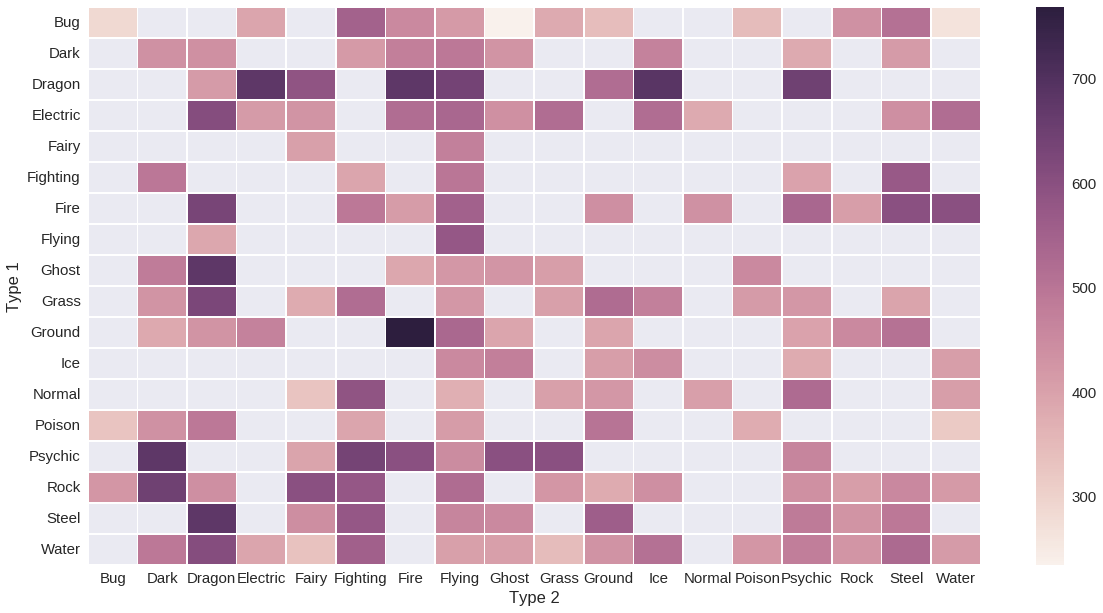

In [77]:
# heat map of Total power
heatMap_df = pokemon_df.groupby(by = ["Type 1", "Type 2"], as_index = False).mean()
totalHeatMap = heatMap_df.pivot(values='Total', index='Type 1', columns='Type 2')
ax = sns.heatmap(totalHeatMap, linewidths = .5)
plt.rcParams['figure.figsize'] = (20, 10)

# Type of Legendary Pokemons
* Dragon & Fire , Dragon & Ice, Dragon & Electric
* Fire & Steel, Fire & Water

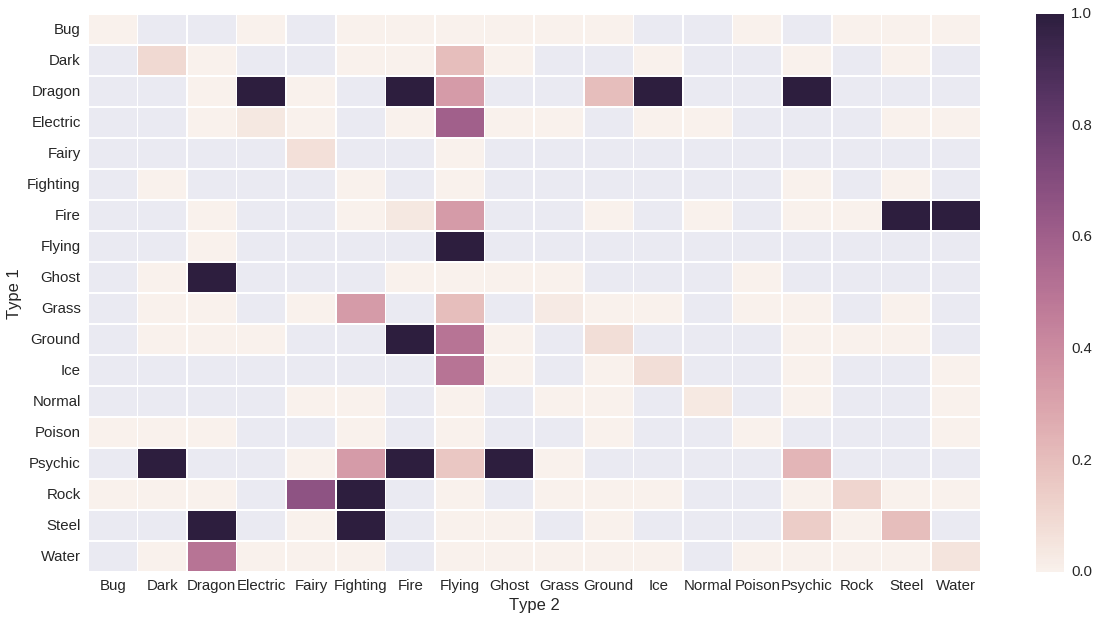

In [78]:
legendaryHeatMap = heatMap_df.pivot(values='Legendary', index='Type 1', columns='Type 2')
ax = sns.heatmap(legendaryHeatMap, linewidths = .5)
plt.rcParams['figure.figsize'] = (20, 10)